(3, 1067, 1600) <class 'numpy.ndarray'>
(1067, 1600, 3)


/home/kevin/env/lib/python3.8/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/home/kevin/env/lib/python3.8/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue:

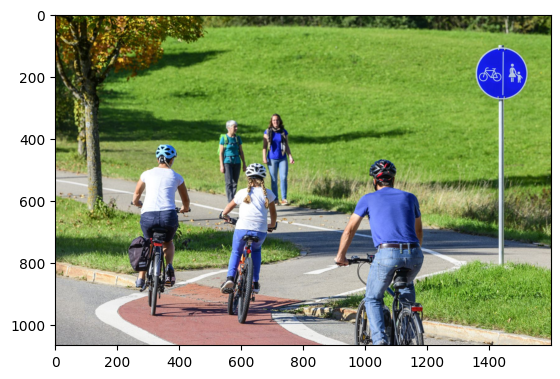

In [2]:
import cv2
import matplotlib.pyplot as plt
import torch
from torchvision.transforms import v2
from torchvision import io
import numpy as np
# > t = torch.Tensor(np.arange(12).reshape(4, 3))
# > permute = [2, 1, 0]
# > t[:, permute]

# print(dir(v2))
frame = io.read_image('/home/kevin/Custom-RT-DETR/rtdetr_pytorch/imgs/bicycle.jpeg').data.numpy()
print(frame.shape, type(frame))
npimg = frame.transpose(1,2,0) #frame.permute(2, 0, 1)
print(npimg.shape)
plt.imshow(npimg)

(3, 1067, 1600)
torch.Size([1600, 3, 1067])
torch.Size([3, 1067, 1600])
torch.Size([3, 640, 640])
torch.Size([640, 640, 3])


/home/kevin/env/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


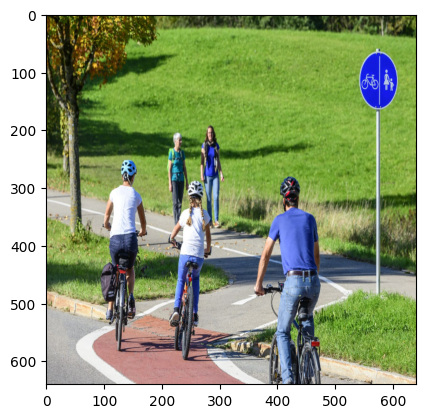

In [3]:
import torchvision.transforms as transforms

resize = transforms.Resize(size=(640, 640))
totensor = transforms.ToTensor()

print(frame.shape)
tensor_frame = totensor(frame)
print(tensor_frame.shape) 
tensor_frame1 = tensor_frame.permute(1, 2, 0) # so can be resized
print(tensor_frame1.shape)
tensor_frame2 = resize(tensor_frame1)
print(tensor_frame2.shape)
tensor_frame3 = tensor_frame2.permute(1, 2,  0) # so can be visualized
print(tensor_frame3.shape)
plt.imshow(tensor_frame3.data.numpy())

(1067, 1600, 3)
torch.Size([3, 640, 640])
torch.Size([640, 640, 3])


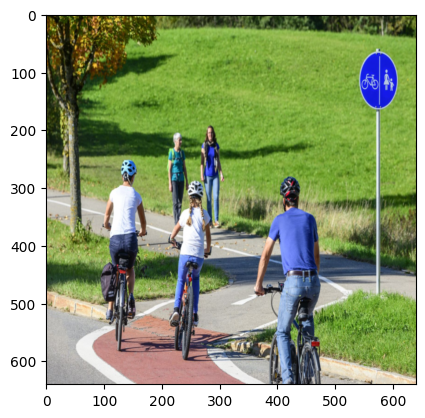

In [19]:
from torchvision.transforms import v2
import copy

transforms = v2.Compose([
    v2.ToImageTensor(),
    v2.ConvertImageDtype(),    
    v2.Resize(size=(640, 640), antialias=True),
    # v2.Resize(size=(640, 640), antialias=True),

])

frame1 = cv2.cvtColor(cv2.imread('/home/kevin/Custom-RT-DETR/rtdetr_pytorch/imgs/bicycle.jpeg'), cv2.COLOR_BGR2RGB)
print(frame1.shape)
transformed = transforms(copy.deepcopy(frame1))
print(transformed.shape)
tr_np = transformed.permute(1, 2, 0)
print(tr_np.shape)
plt.imshow(tr_np.data.numpy())


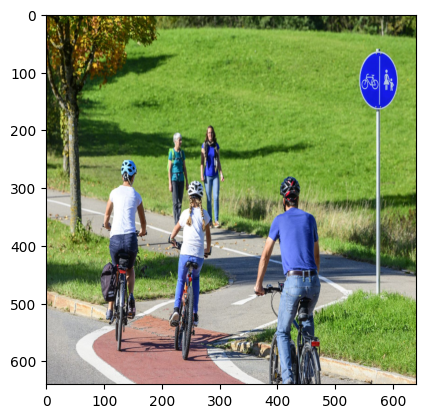

In [5]:
import cv2
import matplotlib.pyplot as plt

frame1 = cv2.imread('/home/kevin/Custom-RT-DETR/rtdetr_pytorch/imgs/bicycle.jpeg')
def preprocess_input(frame, size):
    frame = cv2.resize(frame, (size, size))
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    return frame
out = preprocess_input(frame1, 640)
plt.imshow(out)


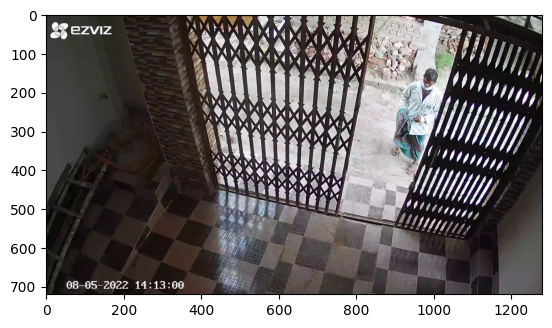

In [1]:
import cv2
import matplotlib.pyplot as plt

cap = cv2.VideoCapture('/home/kevin/Custom-RT-DETR/rtdetr_pytorch/bicycle_thief.mp4')
frames = []
for i in range(1, 10):
    ret, frame = cap.read()
    frames.append(frame)

fr = frames[0]
plt.imshow(cv2.cvtColor(fr, cv2.COLOR_BGR2RGB))
cap.release()

In [5]:
from torchvision.transforms import v2 as trfmv2
preprocess_transformations = trfmv2.Compose([
    trfmv2.ToImageTensor(),
    trfmv2.ConvertImageDtype(),    
    trfmv2.Resize(size=(640, 640), antialias=True),
])
cv2_fr = cv2.cvtColor(fr, cv2.COLOR_BGR2RGB)
print(cv2_fr.shape)
prep_fr = preprocess_transformations(cv2_fr)
prep_fr_cv = cv2.resize(cv2_fr, (640, 640))#prep_fr.permute(1, 2, 0).data.numpy().copy()
prep_fr_cv = cv2.putText(prep_fr_cv, f"FPS: {1000:.2f}", (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)  
print(prep_fr.shape)
# plt.imshow(prep_fr_cv)
# cv2.imwrite('out_test.png', prep_fr_cv)
cv2.imshow('out_test.png', prep_fr_cv)

(720, 1280, 3)
torch.Size([3, 640, 640])


In [ ]:

cap.release()
del cap, frames

In [2]:
import torch
print(torch.device('cuda'))

cuda
